In [ ]:
#pip install seaborn
#!pip install openpyxl

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# DO NOT CHANGE THESE DATAFRAMES
# CREATE COPIES
df_threats = pd.read_csv('df_threats_ss.csv', parse_dates=True)
#df_loss = pd.read_csv('LossFromNetCrime.csv')
#df_world = pd.read_csv('world-data-2023.csv', index_col = 'Country')

# Section 3 - Combining

### Country Codes Hide Cell

In [ ]:
country_codes = {
    "PR": "Puerto Rico", "PS": "Palestine", "PT": "Portugal", "PY": "Paraguay",
    "AE": "United Arab Emirates", "AF": "Afghanistan", "AL": "Albania", "AM": "Armenia",
    "AO": "Angola", "AR": "Argentina", "AT": "Austria", "AU": "Australia",
    "AZ": "Azerbaijan", "RO": "Romania", "BA": "Bosnia and Herzegovina", "RS": "Serbia",
    "BD": "Bangladesh", "RU": "Russia", "BE": "Belgium", "BG": "Bulgaria",
    "BH": "Bahrain", "SA": "Saudi Arabia", "BR": "Brazil", "SC": "Seychelles",
    "SE": "Sweden", "SG": "Singapore", "SI": "Slovenia", "BY": "Belarus",
    "SK": "Slovakia", "BZ": "Belize", "CA": "Canada", "SV": "El Salvador",
    "CH": "Switzerland", "SZ": "Eswatini", "CL": "Chile", "CN": "China",
    "CO": "Colombia", "CR": "Costa Rica", "TH": "Thailand", "CY": "Cyprus",
    "CZ": "Czech Republic", "TR": "Turkey", "DE": "Germany", "TW": "Taiwan",
    "TZ": "Tanzania", "DK": "Denmark", "DO": "Dominican Republic", "UA": "Ukraine",
    "UG": "Uganda", "US": "United States", "EC": "Ecuador", "EE": "Estonia",
    "EG": "Egypt", "UZ": "Uzbekistan", "ES": "Spain", "VE": "Venezuela",
    "VG": "British Virgin Islands", "VN": "Vietnam", "FI": "Finland", "FR": "France",
    "GB": "United Kingdom", "GE": "Georgia", "GH": "Ghana", "GN": "Guinea",
    "GR": "Greece", "GT": "Guatemala", "HK": "Hong Kong", "HN": "Honduras",
    "HR": "Croatia", "YE": "Yemen", "HU": "Hungary", "ID": "Indonesia",
    "IE": "Ireland", "IL": "Israel", "IN": "India", "ZA": "South Africa",
    "IQ": "Iraq", "IR": "Iran", "IS": "Iceland", "IT": "Italy",
    "ZW": "Zimbabwe", "JO": "Jordan", "JP": "Japan", "KE": "Kenya",
    "KG": "Kyrgyzstan", "KH": "Cambodia", "KN": "Saint Kitts and Nevis", "KR": "South Korea",
    "KZ": "Kazakhstan", "LB": "Lebanon", "LK": "Sri Lanka", "LT": "Lithuania",
    "LU": "Luxembourg", "LV": "Latvia", "LY": "Libya", "MD": "Moldova",
    "MM": "Myanmar", "MN": "Mongolia", "MT": "Malta", "MV": "Maldives",
    "MX": "Mexico", "MY": "Malaysia", "MZ": "Mozambique", "NG": "Nigeria",
    "NI": "Nicaragua", "NL": "Netherlands", "NO": "Norway", "NP": "Nepal",
    "NZ": "New Zealand", "OM": "Oman", "PA": "Panama", "PE": "Peru",
    "PG": "Papua New Guinea", "PH": "Philippines", "PK": "Pakistan", "PL": "Poland",
    'NaN': 'NaN'  # Represents missing or undefined country
}

### DataFrame - Trasform Country Codes to Country Names

In [ ]:
# final output dataFrame for this cell = cntry_loss

cntry_loss = df_loss.copy() #copy df
cntry_loss = cntry_loss.rename(columns = {'Country' :'Country Code'}).sort_values(by = 'Country Code') # rename column and sort
#print(cntry_loss.loc[103])
#print(cntry_loss.shape)
cntry_loss = cntry_loss.dropna() # delete the nan columns
#cntry_loss = cntry_loss.drop(axis = 0, index = 103) # delete the nan column
#print(cntry_loss.shape)

column = cntry_loss['Country Code'] # define column variable

# create empty lists
country_col = []
country_id = []
# create a 3 digit country ID
value = 100

for i in column:
    #print(country_codes[i])
    # from list append
    country_col.append(country_codes[i])
    value += 1
    country_id.append((value))

# create new columns
cntry_loss.insert(loc = 1, column = 'Country', value = country_col)
cntry_loss.insert(loc = 1, column = 'Country ID', value = country_id)
# set index = Country
cntry_loss = cntry_loss.set_index('Country').sort_index().copy()

# Copilot soln without the loop
# cntry_loss['Country'] = cntry_loss['Country Code'].map(country_codes)

### Join DataFrames

In [ ]:
cntry_wrld

,Population,GDP
Country,,
Afghanistan,38041754.0,1.910135e+10
Albania,2854191.0,1.527808e+10
Algeria,43053054.0,1.699882e+11
Andorra,77142.0,3.154058e+09
Angola,31825295.0,9.463542e+10
...,...,...
Venezuela,28515829.0,4.823593e+11
Vietnam,96462106.0,2.619212e+11
Yemen,29161922.0,2.691440e+10


In [ ]:
# final output dataFrame for this cell = df_join_23

# work with world data
cntry_wrld = df_world.sort_index()[['Population', 'GDP']].copy() # choose relevant cols
cntry_wrld = cntry_wrld.dropna() # delete the nan columns

# ~~~ make Population into type = float
list_pop = [] # list of population

for i in cntry_wrld['Population']:
    i = i.replace(',', '') # delete chars
    list_pop.append(float(i)) # append float(population)

cntry_wrld['Population'] = list_pop

list_gdp = []

# ~~~ make GDP into type = float
for i in cntry_wrld['GDP']:
    i = i.replace(',', '') # delete chars
    i = i.replace('$', '')
    list_gdp.append(float(i))

cntry_wrld['GDP'] = list_gdp

# WORLD data are from 2023
# df.join() is for joining the dfs by indeces
df_join_23 = cntry_wrld.join(cntry_loss[['2023_Complaints', '2023_Losses']], lsuffix = '_l', how = 'inner')

In [ ]:
df_join_23

,Population,GDP,2023_Complaints,2023_Losses
Country,,,,
Afghanistan,38041754.0,1.910135e+10,1150,38527355
Albania,2854191.0,1.527808e+10,2178,46707757
Angola,31825295.0,9.463542e+10,1336,15792180
Argentina,44938712.0,4.496634e+11,8511,372985785
Armenia,2957731.0,1.367280e+10,5041,114193013
...,...,...,...,...
Uzbekistan,33580650.0,5.792129e+10,1414,31812459
Venezuela,28515829.0,4.823593e+11,11897,306878450
Vietnam,96462106.0,2.619212e+11,51411,1166933394


### Correlations

In [ ]:
new_df = df_join_23[['2023_Complaints', 'Population']]
new_df.corr(numeric_only = True)

,2023_Complaints,Population
2023_Complaints,1.000000,0.534335
Population,0.534335,1.000000


In [ ]:
new_df = df_join_23[['2023_Complaints', 'GDP']]
new_df.corr(numeric_only = True)

,2023_Complaints,GDP
2023_Complaints,1.000000,0.924679
GDP,0.924679,1.000000


## Start Plotting

In [ ]:
arr_com = np.array(df_join_23.sort_values(by = '2023_Complaints')['2023_Complaints'])
arr_pop = np.array(df_join_23.sort_values(by ='2023_Complaints')['Population'])
arr_gdp = np.array(df_join_23.sort_values(by ='2023_Complaints')['GDP'])

In [ ]:
# Removing Outliers

# Create conditions
cond_pop = np.where(arr_pop > 0.8*10**9)
cond_com = (np.where(arr_com > 30000))[0].tolist()
#cond = []

new_com = np.delete(arr_com,[ 99, 108] + cond_com)
new_pop = np.delete(arr_pop, [ 99, 108] + cond_com)
new_gdp = np.delete(arr_gdp, [ 99, 108] + cond_com)

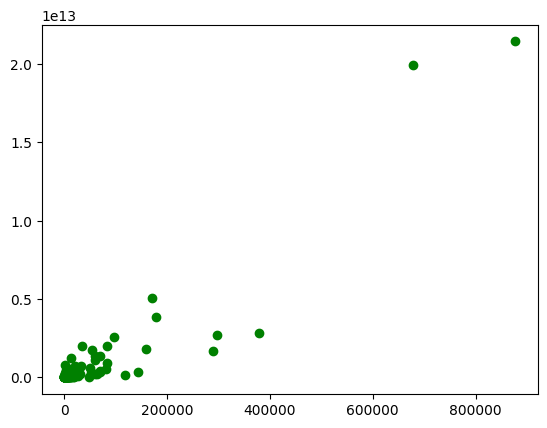

In [ ]:
plt.plot(arr_com, arr_gdp, 'o', color = 'g')

line_x = np.array([new_com[0], new_com[-1]])
line_y =  np.array([new_gdp[0], new_gdp[-1]])

#plt.plot(line_x, line_y)
#plt.yscale('log')
#plt.xscale('log')

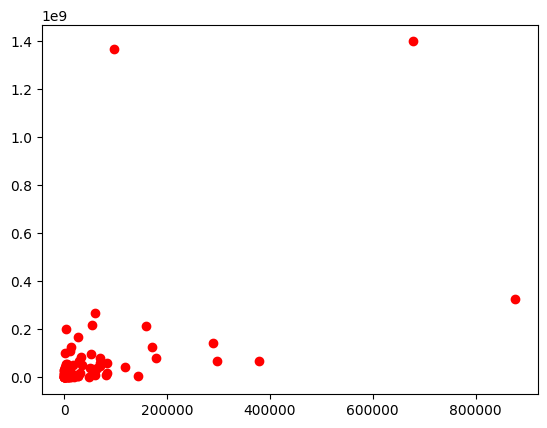

In [ ]:
plt.plot(arr_com, arr_pop, 'o', color = 'r')

line_x = np.array([new_com[0], new_com[-1]])
line_y =  np.array([new_gdp[0], new_gdp[-1]])

#plt.plot(line_x, line_y)
#plt.yscale('log')
#plt.xscale('log')

In [ ]:
np.corrcoef(new_com, new_gdp)

array([[1.        , 0.38828987],
       [0.38828987, 1.        ]])

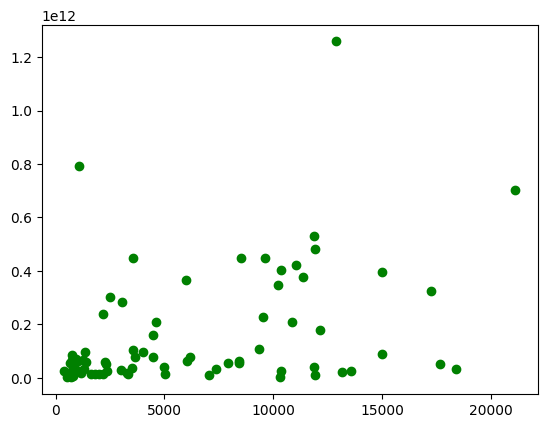

In [ ]:
plt.plot(new_com, new_gdp, 'o', color = 'g')

line_x = np.array([new_com[0], new_com[-1]])
line_y =  np.array([new_gdp[0], new_gdp[-1]])

#plt.plot(line_x, line_y)
#plt.yscale('log')
#plt.xscale('log')

# Section 4 - Analysis of cyber attacks

## Cyber Incidents Dataset — Notebook Overview

This notebook uses a curated subset of a Zenodo-hosted catalog of cyber incidents. Each row represents a single incident targeting an entity in a specific country, with attributes describing when it started, who targeted whom, how it was carried out, what was impacted, and whether it may have breached international law. The data supports exploratory analysis of timelines, geographies, attack categories, and outcomes (e.g., political responses, intelligence impacts).

**Column Dictionary**

* **Start date** — The calendar date on which the incident began,
suitable for parsing to datetime.

* **Incident type** — A categorical label describing the specific mode of attack (e.g., DDoS, intrusion, malware, defacement, phishing).

* **Receiver country** — The primary country that was targeted or affected by the incident.

* **Category** — A higher-level grouping of the incident (e.g., espionage, disruption, influence, sabotage) used for broader aggregation.

* **Initiator country** — The country attributed as the origin/sponsor of the incident (may be Unknown or disputed).

* **Political responses** — Recorded official or public reactions to the incident (e.g., sanctions, diplomatic statements, expulsions), often as free text and potentially multi-valued.

* **MITRE Impact** — The effect of the incident aligned to MITRE ATT&CK “Impact” outcomes (e.g., service disruption, data manipulation/destruction, resource hijacking).

* **Intelligence impact** — A qualitative assessment of information compromise or manipulation  

  *Scale 1–5:*
* 1 — no data breach/exfiltration, manipulation, or leaking;
*2 — minor data breach/exfiltration (no sensitive/critical information), with no manipulation or leaking;
*3 — data manipulation (e.g., deletion/altering) or a major data breach/exfiltration, but without leaking/manipulation;
*4 — minor data breach/exfiltration with manipulation and/or leaking;
*5 — major data breach/exfiltration of sensitive/critical information and data manipulation and/or leaking.

* **International Law Breach Indicator** — A binary/ordinal flag indicating whether the incident was assessed as breaching international law (e.g., Yes/No or 1/0).

* **Year of incident** — The four-digit year associated with the incident (usually derived from Start date) for convenient time-based grouping.

In [5]:
df_threats.head()

,Start date,Incident type,Receiver country,Category,Initiator country,Political responses,MITRE Impact,Intelligence impact,International Law Breach Indicator,Year
0,2015-01-01,Data theft,China,Other,China,0,Data Exfiltration,5,Human rights,2015
1,2015-01-01,Data theft,United Kingdom,Government,Russia,1,Data Exfiltration,2,Cyber espionage,2015
2,2015-01-01,Data theft,China,Other,China,0,Data Exfiltration,2,Cyber espionage,2015
3,2016-01-01,Data theft,Ukraine,Other,Ukraine,0,Data Exfiltration,2,Human rights,2016
4,2017-01-01,Data theft,Netherlands,Critical Manufacturing,China,0,Data Exfiltration,3,Due diligence,2017


### Category vs Intelligence Impact

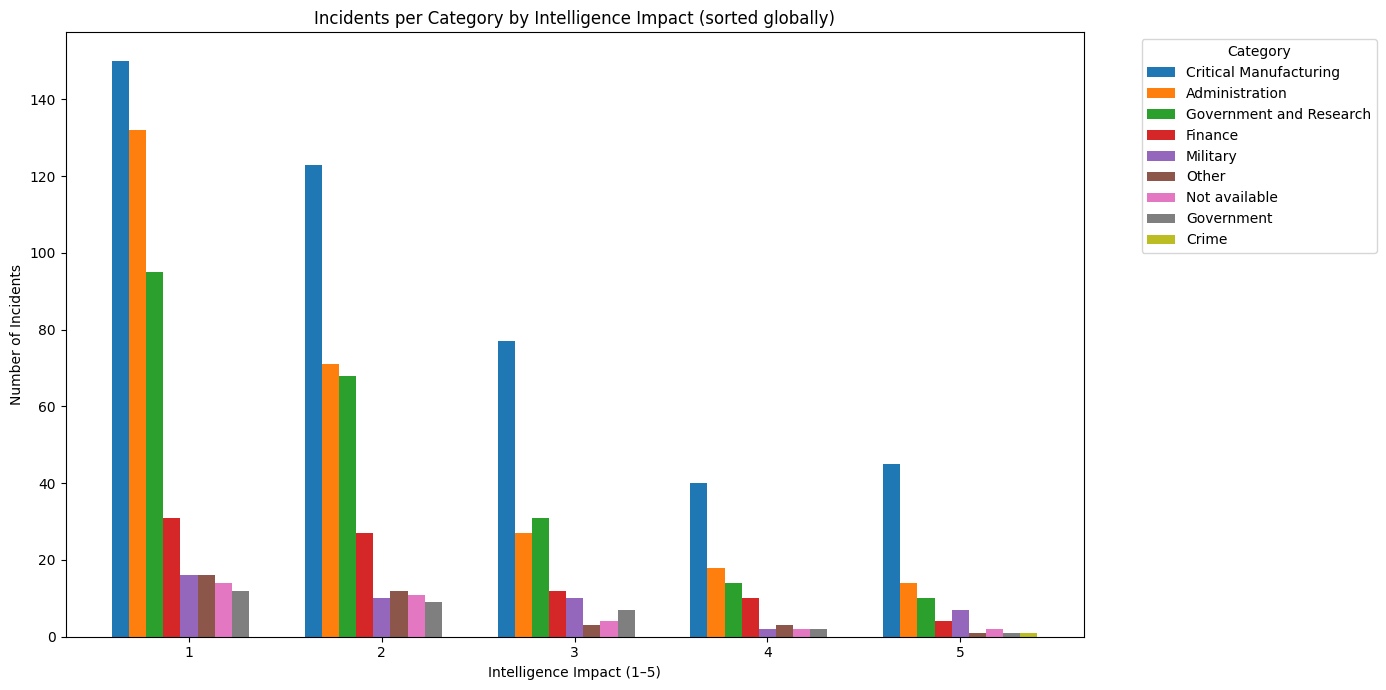

In [6]:
impact_counts = df_threats.groupby(["Intelligence impact", "Category"])["Incident type"].count().unstack(fill_value=0)
impact_counts = impact_counts[impact_counts.sum(axis=0).sort_values(ascending=False).index]

x = np.arange(len(impact_counts.index))
width = 0.8 / len(impact_counts.columns)

plt.figure(figsize=(14,7))
for i, category in enumerate(impact_counts.columns):
    plt.bar(x + i*width, impact_counts[category], width=width, label=category)

plt.xticks(x + width*(len(impact_counts.columns)-1)/2, impact_counts.index)
plt.xlabel("Intelligence Impact (1–5)")
plt.ylabel("Number of Incidents")
plt.title("Incidents per Category by Intelligence Impact (sorted globally)")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Most vulnerable sector (by number of incidents)

<Figure size 1400x700 with 0 Axes>

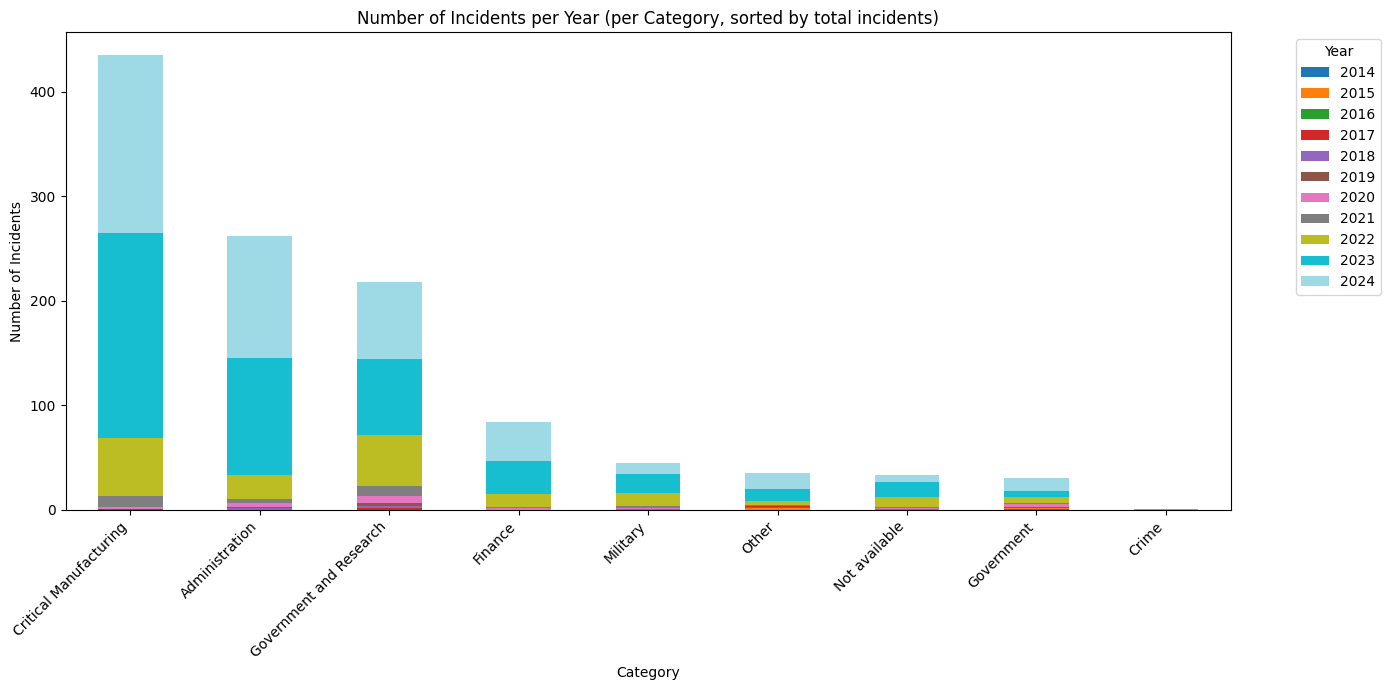

In [9]:
df_threats["Start date"] = pd.to_datetime(df_threats["Start date"], errors="coerce")
df_threats["Year"] = df_threats["Start date"].dt.year

category_counts_per_year = df_threats.groupby(["Category", "Year"])["Incident type"].count().unstack(fill_value=0)

category_counts_per_year = category_counts_per_year.loc[category_counts_per_year.sum(axis=1).sort_values(ascending=False).index]

plt.figure(figsize=(14,7))
category_counts_per_year.plot(kind="bar", stacked=True, figsize=(14,7), colormap="tab20")
plt.title("Number of Incidents per Year (per Category, sorted by total incidents)")
plt.xlabel("Category")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

max_per_category = category_counts_per_year.idxmax(axis=1)
counts_per_category = category_counts_per_year.max(axis=1)

### Average Intelligence Impact by International Law Breach

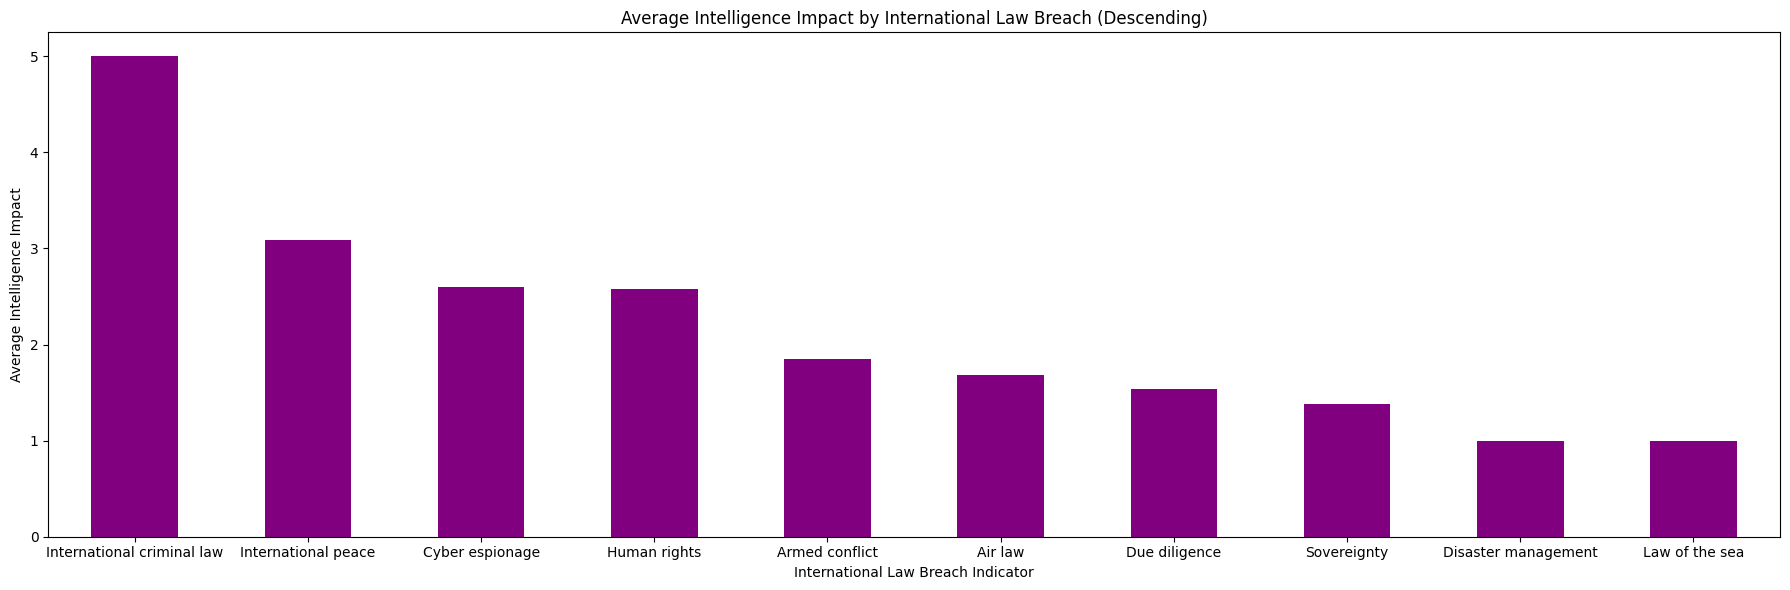

In [11]:
law_vs_impact = (
    df_threats.groupby("International Law Breach Indicator")["Intelligence impact"]
    .mean()
    .sort_values(ascending=False)   # sort descending
)

plt.figure(figsize=(18,6))
law_vs_impact.plot(kind="bar", color="purple")
plt.title("Average Intelligence Impact by International Law Breach (Descending)")
plt.ylabel("Average Intelligence Impact")
plt.xlabel("International Law Breach Indicator")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Incident type vs MITRE Impact

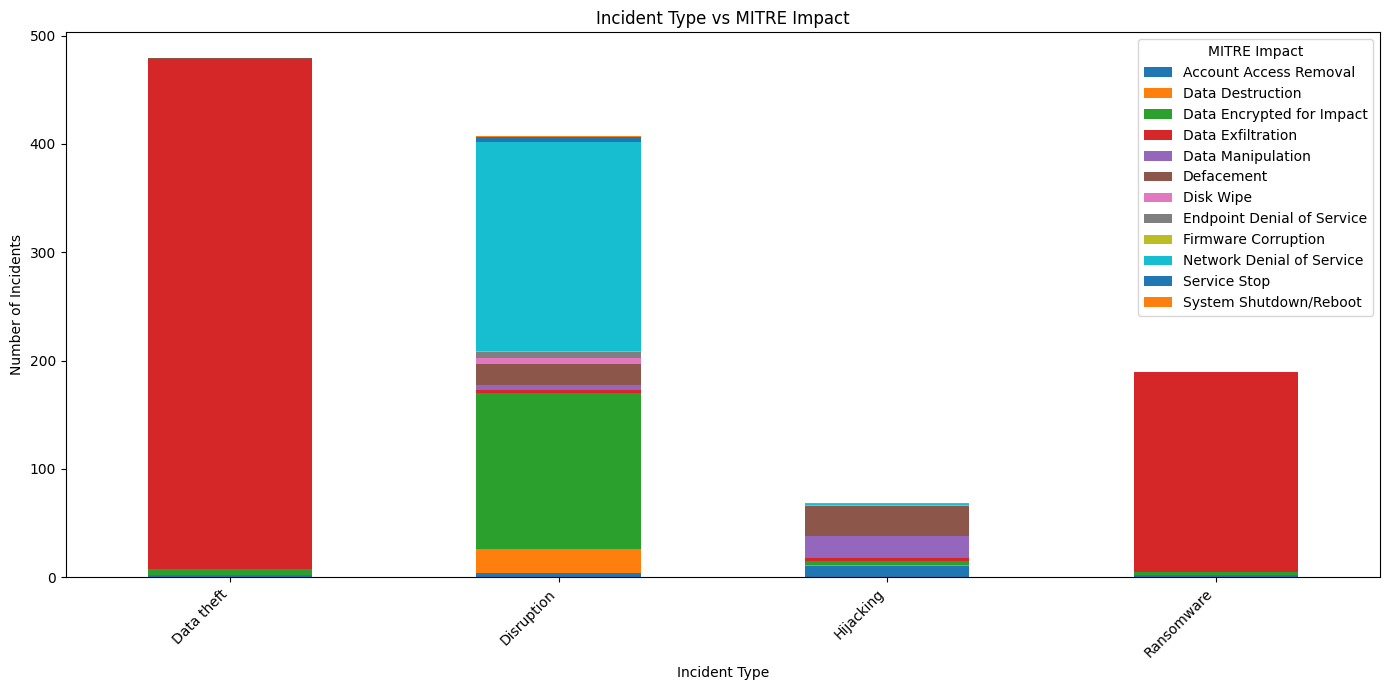

In [12]:
incident_mitre = df_threats.groupby(["Incident type", "MITRE Impact"])["Start date"].count().unstack(fill_value=0)

incident_mitre.plot(kind="bar", stacked=True, figsize=(14,7))
plt.title("Incident Type vs MITRE Impact")
plt.ylabel("Number of Incidents")
plt.xlabel("Incident Type")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Incident type vs International Law Breach Indicator

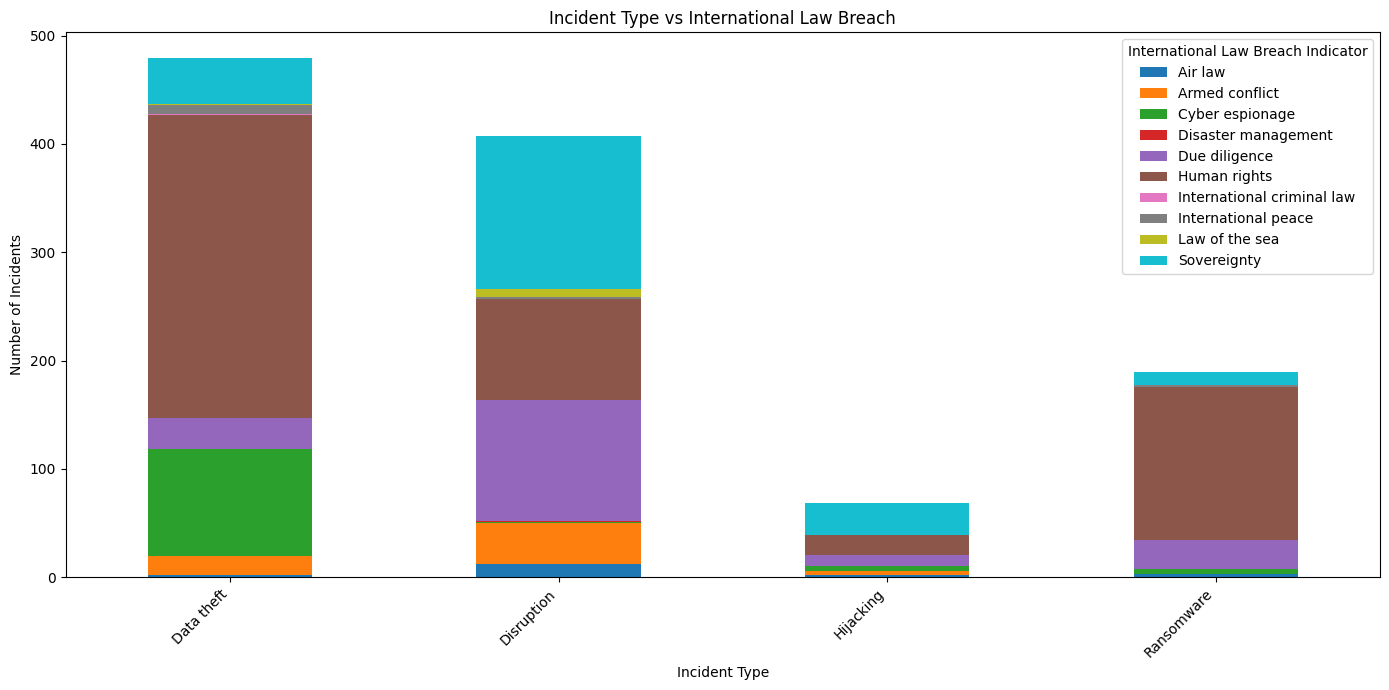

In [13]:
incident_law = df_threats.groupby(["Incident type", "International Law Breach Indicator"])["Start date"].count().unstack(fill_value=0)

incident_law.plot(kind="bar", stacked=True, figsize=(14,7))
plt.title("Incident Type vs International Law Breach")
plt.ylabel("Number of Incidents")
plt.xlabel("Incident Type")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Incident Type vs Initiator Country (Top 10)

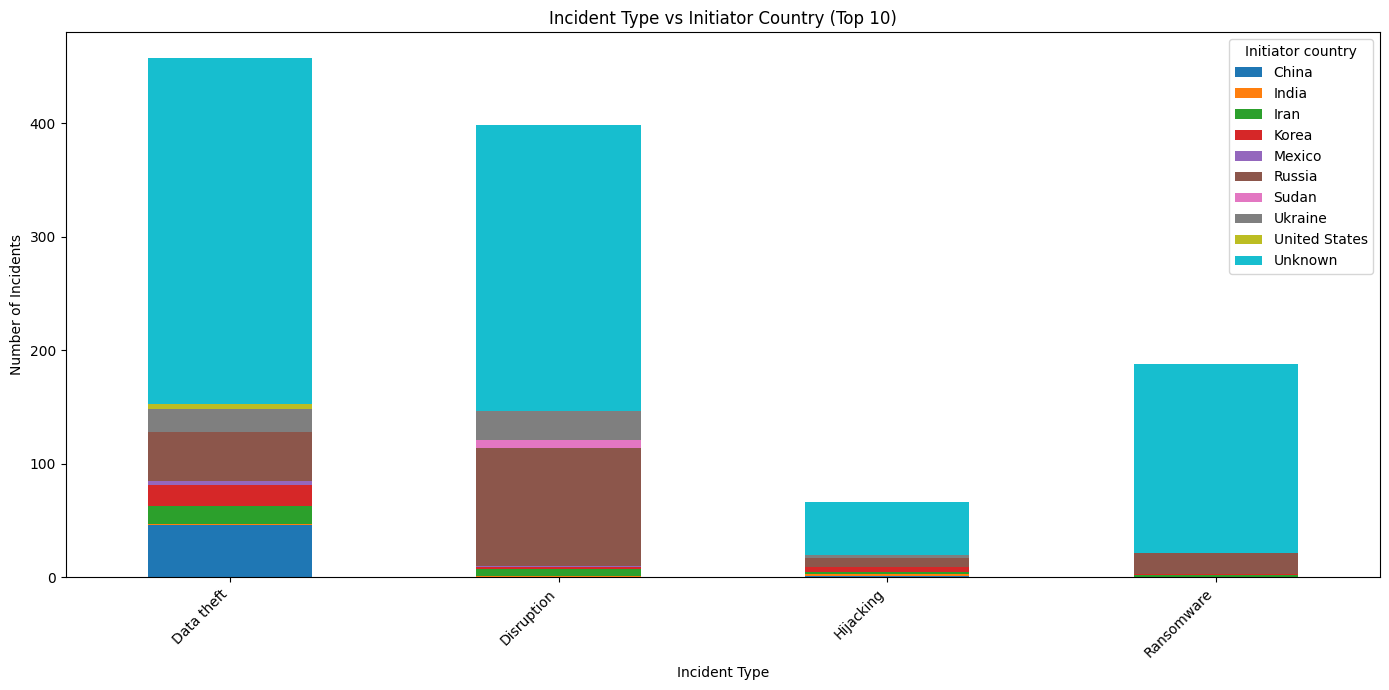

In [14]:
top_countries = df_threats["Initiator country"].value_counts().nlargest(10).index
df_top_initiators = df_threats[df_threats["Initiator country"].isin(top_countries)]

incident_initiator = df_top_initiators.groupby(["Incident type", "Initiator country"])["Start date"].count().unstack(fill_value=0)

incident_initiator.plot(kind="bar", stacked=True, figsize=(14,7))
plt.title("Incident Type vs Initiator Country (Top 10)")
plt.ylabel("Number of Incidents")
plt.xlabel("Incident Type")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Incident type vs Year (time trends)

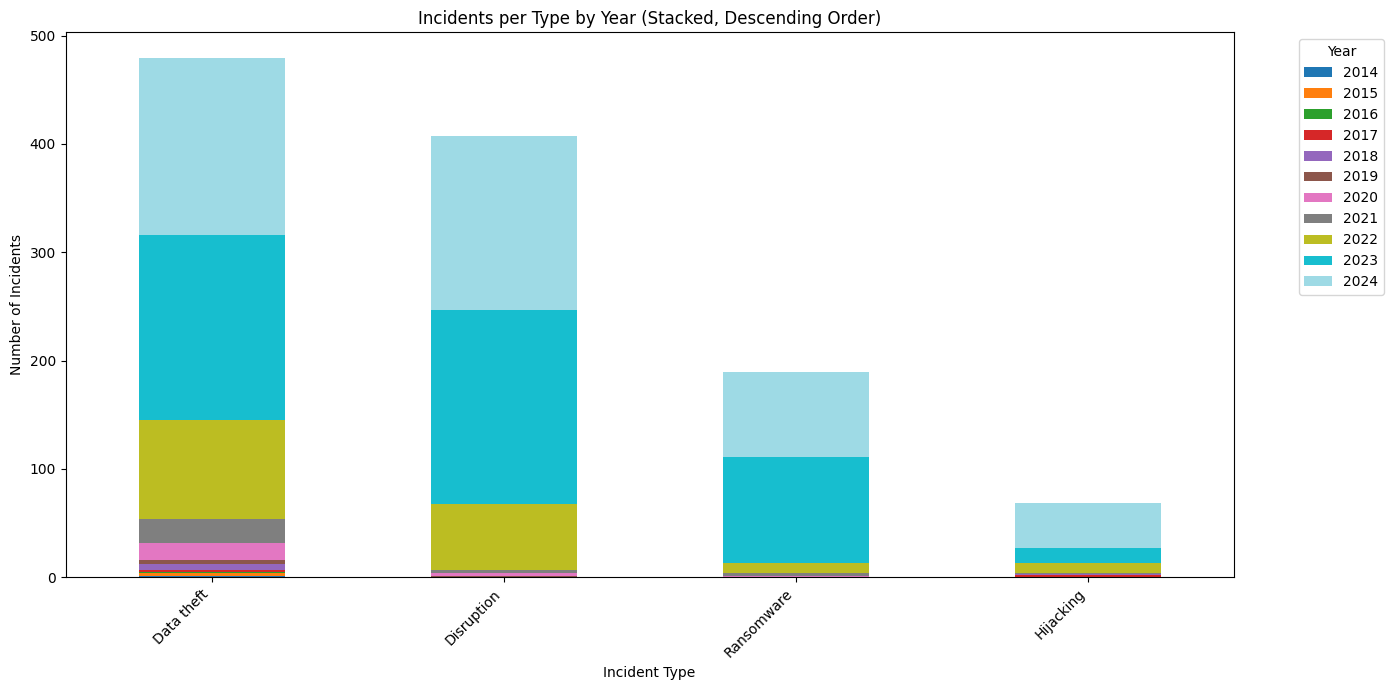

In [15]:
df_threats["Year"] = pd.to_datetime(df_threats["Start date"], errors="coerce").dt.year

# Group by Incident type and Year
incident_type_year = df_threats.groupby(["Incident type", "Year"])["Start date"].count().unstack(fill_value=0)

# Sort incident types by total number of incidents (descending)
incident_type_year = incident_type_year.loc[incident_type_year.sum(axis=1).sort_values(ascending=False).index]

# Plot stacked bar chart
incident_type_year.plot(
    kind="bar",
    stacked=True,
    figsize=(14,7),
    colormap="tab20"
)

plt.title("Incidents per Type by Year (Stacked, Descending Order)")
plt.xlabel("Incident Type")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# Section 5 - Cyber Crime Losses & Complaints – Guided Analysis

Welcome! This notebook is designed for **non‑technical and non‑coding users** who need to explore a cyber crime dataset and prepare results for Power BI.  \
We will walk through each step, explain what the code does in plain language, and export tables to CSV files so you can create charts in Power BI without writing any code yourself.  \
If a plot would normally appear in Python, we instead save the underlying data for Power BI.  \
At the end you will have several CSV files ready to import into Power BI to create your own charts.

## 1. Load and prepare the data

In this section we will:

1. Import the Python packages we need.
2. Create a folder to store our output files (so everything is in one place).
3. Read the cyber crime dataset from `LossFromNetCrime.csv`.
4. Clean the data by filling missing country names and converting numeric columns to numbers.
5. Define the list of years (2019–2024) we will analyse.

Everything is commented so you can follow along even if you have never coded before.

In [ ]:
# Import Python packages
import os
import pandas as pd
import numpy as np

# 1.1 Create an output folder if it does not already exist.
# All of our CSV files will be saved here.
os.makedirs('Code_Output', exist_ok=True)

# 1.2 Load the cyber crime dataset into a pandas DataFrame.
# The CSV file contains rows for countries and columns for each year’s complaints and losses.
df_loss = pd.read_csv('LossFromNetCrime.csv')

# 1.3 Replace any missing country names with 'Unknown'.
# This prevents errors when sorting or grouping.
df_loss['Country'] = df_loss['Country'].fillna('Unknown')

# 1.4 Convert all columns except 'Country' to numbers.
# Sometimes numbers are stored as text; this forces them to numeric so we can add and average them.
numeric_cols = [c for c in df_loss.columns if c != 'Country']
df_loss[numeric_cols] = df_loss[numeric_cols].apply(pd.to_numeric, errors='coerce')

# 1.5 Define the years we will analyse.
years = [2019, 2020, 2021, 2022, 2023, 2024]

# 1.6 Display the first few rows to verify the data loaded correctly.
df_loss.head()

## 2. Totals by year and changes

To understand the overall trend, we need to know how many complaints and how much money was lost across **all countries** each year.

We will:

- Sum complaints and losses for each year.
- Compute the change from one year to the next (this shows whether things are getting better or worse).
- Save the results to a CSV file for Power BI (`totals.csv`).
- Display the table in the notebook for reference.

In [ ]:
# 2.1 Calculate total complaints and losses for each year across all countries
totals = []
for year in years:
    total_complaints = df_loss[f'{year}_Complaints'].sum()
    total_losses = df_loss[f'{year}_Losses'].sum()
    totals.append({
        'Year': year,
        'Total_Complaints': total_complaints,
        'Total_Losses': total_losses
    })

# 2.2 Convert the list of totals to a DataFrame
totals_df = pd.DataFrame(totals)

# 2.3 Compute year‑over‑year changes
totals_df['Complaints_Change'] = totals_df['Total_Complaints'].diff()
totals_df['Losses_Change'] = totals_df['Total_Losses'].diff()

# 2.4 Save the totals and changes to CSV for Power BI
totals_df.to_csv('Code_Output/totals.csv', index=False)

# 2.5 Display the totals table
totals_df

## 3. Top countries by complaints and losses (per year)

Power BI visualisations often focus on the top performers or worst offenders. We will identify the **top 5 countries** for each year based on both complaints and losses. Instead of plotting the results here, we build tidy tables for Power BI:

- `top5_complaints_chart_data.csv`: Each row contains the year, country, and complaints (in millions).
- `top5_losses_chart_data.csv`: Each row contains the year, country, and losses (in billions).

These files allow you to create bar charts in Power BI showing the top countries year by year.

In [ ]:
# 3.1 Build the data for top 5 complaints per year
complaint_rows = []
for year in years:
    col_name = f'{year}_Complaints'
    # Sort the countries by complaints for this year and take the top 5
    top5 = df_loss.sort_values(by=col_name, ascending=False).head(5)
    for country, value in zip(top5['Country'], top5[col_name]):
        complaint_rows.append({
            'Year': year,
            'Country': country,
            'Complaints_Millions': value / 1_000_000
        })

complaint_chart_df = pd.DataFrame(complaint_rows)

# 3.2 Save the data to CSV
complaint_chart_df.to_csv('Code_Output/top5_complaints_chart_data.csv', index=False)

# 3.3 Display the first few rows for reference
complaint_chart_df.head()

In [ ]:
# 3.4 Build the data for top 5 losses per year
loss_rows = []
for year in years:
    col_name = f'{year}_Losses'
    top5 = df_loss.sort_values(by=col_name, ascending=False).head(5)
    for country, value in zip(top5['Country'], top5[col_name]):
        loss_rows.append({
            'Year': year,
            'Country': country,
            'Losses_Billions': value / 1_000_000_000
        })

loss_chart_df = pd.DataFrame(loss_rows)

# 3.5 Save to CSV
loss_chart_df.to_csv('Code_Output/top5_losses_chart_data.csv', index=False)

# 3.6 Display the first few rows
loss_chart_df.head()

## 4. Correlation between complaints and losses

Do countries with more complaints also experience higher financial losses? To find out, we calculate the **Pearson correlation coefficient** between complaints and losses for each year. This statistic ranges from –1 (strong negative relationship) to +1 (strong positive relationship). We save the results to `correlation_complaints_losses.csv`.

In [ ]:
# 4.1 Compute the correlation for each year
correlation_list = []
for year in years:
    complaints_col = f'{year}_Complaints'
    losses_col = f'{year}_Losses'
    corr_value = df_loss[complaints_col].corr(df_loss[losses_col])
    correlation_list.append({'Year': year, 'Correlation': corr_value})

# 4.2 Create a DataFrame of correlation values
corr_df = pd.DataFrame(correlation_list)

# 4.3 Save to CSV for Power BI
corr_df.to_csv('Code_Output/correlation_complaints_losses.csv', index=False)

# 4.4 Show the table
corr_df

## 5. Predicting 2025 losses using the average change

The original analysis estimated 2025 losses by adding the average year‑over‑year change.  We will keep that simple method here.

For each selected country we look at its losses from 2019 to 2024, compute the differences from one year to the next, average those differences, and then add this average change to the 2024 value to get a prediction for 2025.

We will:

1. Identify key countries: the union of the top five by total losses and by total complaints across all years.
2. Compute the average yearly change in losses for each country (if there is no change, the average is zero).
3. Predict the 2025 loss by adding this average change to the 2024 loss.
4. Save the predictions to `predicted_losses_2025.csv`.


In [ ]:
# 5.1 Compute total losses and complaints for each country (across all years)
df_loss['Total_Losses'] = df_loss[[f'{y}_Losses' for y in years]].sum(axis=1)
df_loss['Total_Complaints'] = df_loss[[f'{y}_Complaints' for y in years]].sum(axis=1)

# 5.2 Determine the union of top 5 countries by total losses and total complaints
top5_by_losses = df_loss.nlargest(5, 'Total_Losses')['Country'].tolist()
top5_by_complaints = df_loss.nlargest(5, 'Total_Complaints')['Country'].tolist()
selected_countries = sorted(set(top5_by_losses + top5_by_complaints))

# 5.3 For each country, compute the average year-to-year change and predict 2025
predictions = []
for country in selected_countries:
    # Gather the six years of losses for this country
    losses = [df_loss.loc[df_loss['Country'] == country, f'{year}_Losses'].values[0] for year in years]
    # Compute year-to-year differences
    diffs = np.diff(losses)
    # Average difference (0 if no changes)
    avg_diff = diffs.mean() if len(diffs) > 0 else 0
    # Predict 2025 as 2024 value plus average difference
    predicted_2025 = losses[-1] + avg_diff
    predictions.append({
        'Country': country,
        'Losses_2024': losses[-1],
        'Predicted_Losses_2025': predicted_2025
    })

# 5.4 Convert predictions to a DataFrame
pred_df = pd.DataFrame(predictions)

# 5.5 Save to CSV
pred_df.to_csv('Code_Output/predicted_losses_2025.csv', index=False)

# 5.6 Show the predictions sorted by predicted value
pred_df.sort_values(by='Predicted_Losses_2025', ascending=False)


## 5b - Prediction for a single country. 

In [9]:
# Prediction for a single country
# --------------------------------
# Change the value of country_code to any country present in your dataset (e.g., 'US', 'CN', 'DE').
# The code will calculate the average year‑to‑year change in losses for that country and predict the 2025 loss.

country_code = 'PL'  # <-- Edit this to the desired country code

# Extract the past losses for the selected country across all defined years
losses_country = [
    df_loss.loc[df_loss['Country'] == country_code, f'{year}_Losses'].values[0]
    for year in years
]

# Compute the differences between consecutive years and their average
diffs_country = np.diff(losses_country)
avg_diff_country = diffs_country.mean() if len(diffs_country) > 0 else 0

# Predict the 2025 loss based on the average change
predicted_2025_country = losses_country[-1] + avg_diff_country

# Build a summary table for the selected country
single_country_pred = pd.DataFrame({
    'Country': [country_code],
    'Losses_2024': [losses_country[-1]],
    'Predicted_Losses_2025': [predicted_2025_country],
    'Change_from_2024_to_2025': [predicted_2025_country - losses_country[-1]]
})

# Save the result to a CSV file for Power BI
single_country_pred.to_csv(f'Code_Output/predicted_losses_2025_{country_code}.csv', index=False)

# Display the summary table
single_country_pred

,Country,Losses_2024,Predicted_Losses_2025,Change_from_2024_to_2025
0,PL,1359253205,1.553031e+09,193777502.0


## 6. Build a tidy table for actual vs predicted losses

To visualise the results in Power BI, we prepare a **tidy** table where each row represents a single observation (country–year–loss type).

This table includes:

- The actual losses for 2019–2024 (in billions).
- The predicted loss for 2025 (in billions).
- A column named `Type` indicating whether the value is Actual or Predicted.

We save this table to `actual_vs_predicted_losses_by_country.csv`.

In [ ]:
# 6.1 Build a tidy DataFrame of actual and predicted losses
rows = []
for country in selected_countries:
    # Actual data: convert each year's loss to billions
    actual_losses = [df_loss.loc[df_loss['Country'] == country, f'{year}_Losses'].values[0] for year in years]
    actual_losses_b = [val / 1e9 for val in actual_losses]
    for year_val, val in zip(years, actual_losses_b):
        rows.append({
            'Country': country,
            'Year': year_val,
            'Losses_Billions': val,
            'Type': 'Actual'
        })
    # Predicted: use the regression prediction for 2025
    predicted_b = pred_df.loc[pred_df['Country'] == country, 'Predicted_Losses_2025'].values[0] / 1e9
    rows.append({
        'Country': country,
        'Year': 2025,
        'Losses_Billions': predicted_b,
        'Type': 'Predicted'
    })

# 6.2 Create a DataFrame and save to CSV
pred_chart_df = pd.DataFrame(rows)
pred_chart_df.to_csv('Code_Output/actual_vs_predicted_losses_by_country.csv', index=False)

# 6.3 Display a few rows to verify
pred_chart_df.head()

## 7. Summary and next steps

We have now:

- Loaded and cleaned the cyber crime dataset.
- Calculated annual totals and changes.
- Identified top countries for complaints and losses.
- Evaluated the correlation between complaints and losses.
- Predicted 2025 losses using the average change.
- Prepared a tidy dataset for plotting actual vs predicted losses.

All tables have been saved to the `Code_Output` folder as CSV files.  \
We can now import these files into Power BI to create bar charts, line charts, and other visualisations.  \
In Power BI remember to set the appropriate data types (e.g., `Year` as a whole number) and choose **Sum** for numeric fields.